In [3]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the dataset into python environment

In [4]:
data = pd.read_csv(r'C:\Users\Dell\Downloads\titanic_dataset.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [6]:
data = data.set_index(['PassengerId'])

In [7]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [10]:
data.shape

(891, 11)

In [11]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

# 4. Fill in all the missing values present in all the columns in the dataset

In [12]:
# Finding Missing Values

In [13]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# filling the Missing values ,(1. Findout the outliers by plotting)

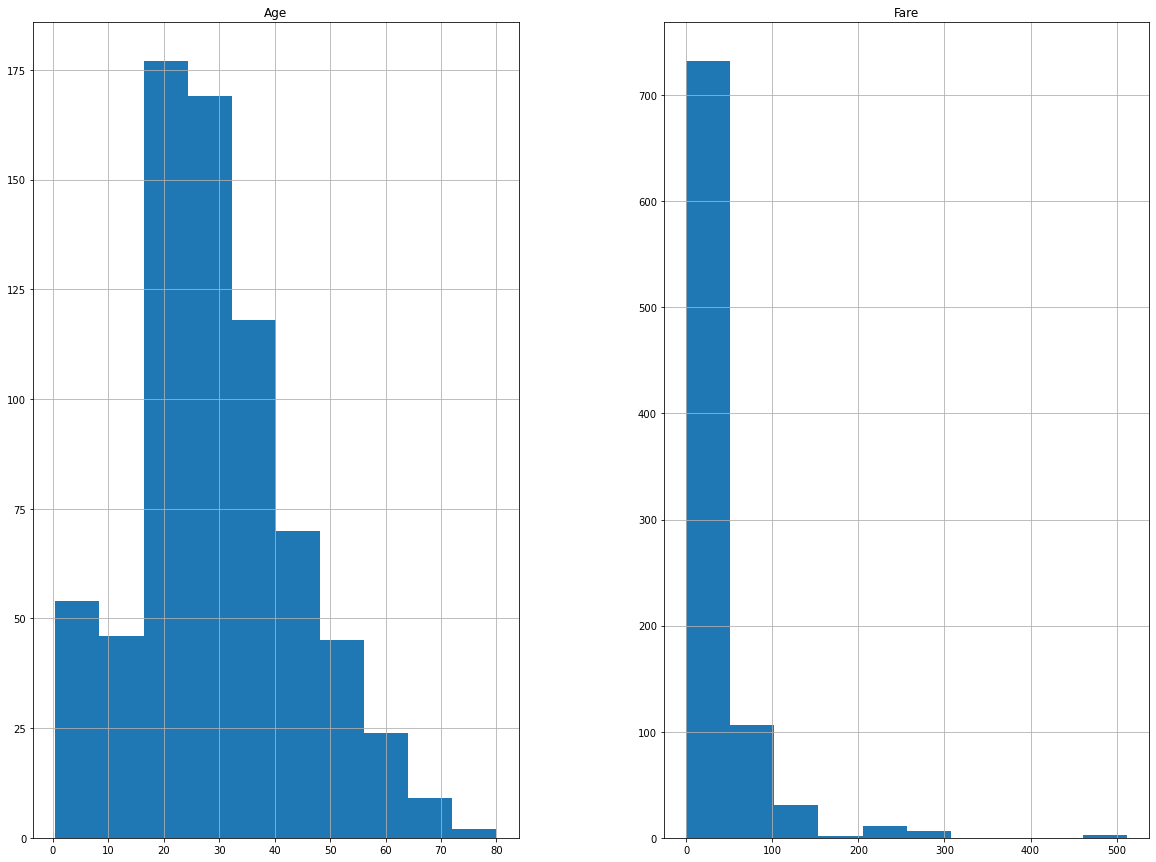

In [16]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

Outliers for "Age" And "Fare"

In [17]:
col=data.columns
col

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
for col in[ 'Age','Fare']:
    data[col]=data[col].fillna(data[col].median())

In [19]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Handling Missing values in Categorical Values

In [21]:
data=data.fillna(data.mode().iloc[0])

In [22]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# TO check duplicates

In [23]:
data.duplicated()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Length: 891, dtype: bool

# To Remove duplicates

In [92]:
#data.drop_duplicates()

In [25]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Boxplot of Age column')

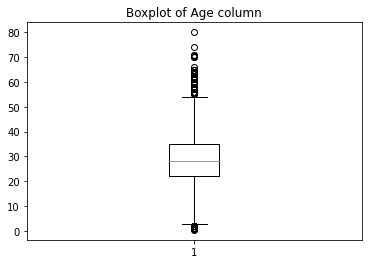

In [26]:
plt.boxplot(data['Age'])
plt.title('Boxplot of Age column')

There are Outliers, To remove Find out Q1,Q2,Q3

In [27]:
Q1 =np.percentile(data['Age'],25,interpolation='midpoint')
Q2 =np.percentile(data['Age'],50,interpolation='midpoint')
Q3 =np.percentile(data['Age'],75,interpolation='midpoint')

In [28]:
print("Q1",Q1)
print("Q2",Q2)
print("Q3",Q3)

Q1 22.0
Q2 28.0
Q3 35.0


In [29]:
data['Age'].median()

28.0

In [30]:
IQR=Q3-Q1
print("IQR =",IQR)

IQR = 13.0


In [31]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [32]:
print(low_lim)
print(up_lim)

2.5
54.5


In [33]:
outlier =[]
for x in data['Age']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)

In [34]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [35]:
ind=data['Age']>up_lim

In [36]:
data.loc[ind].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [37]:
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [38]:
data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,B96 B98,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,B96 B98,S


Text(0.5, 1.0, 'Boxplot of Fare column')

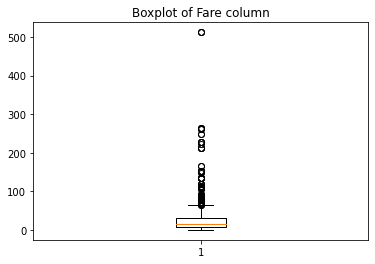

In [39]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare column')

In [40]:
Q1 =np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 =np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 =np.percentile(data['Fare'],75,interpolation='midpoint')

In [41]:
print("Q1",Q1)
print("Q2",Q2)
print("Q3",Q3)

Q1 7.8958
Q2 14.1083
Q3 30.5


In [42]:
data['Fare'].median()

14.1083

In [43]:
IQR=Q3-Q1
print("IQR =",IQR)

IQR = 22.6042


In [44]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [45]:
print(low_lim)
print(up_lim)

-26.0105
64.4063


In [46]:
outlier =[]
for x in data['Fare']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)

In [47]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [48]:
ind=data['Fare']>up_lim

In [50]:
data.loc[ind].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=108)

In [51]:
#data=data.drop([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
 #           780, 790, 793, 803, 821, 836, 847, 850, 857, 864],inplace=True)

IndentationError: unexpected indent (3727703377.py, line 2)

Text(0.5, 1.0, 'Boxplot of Pclass column')

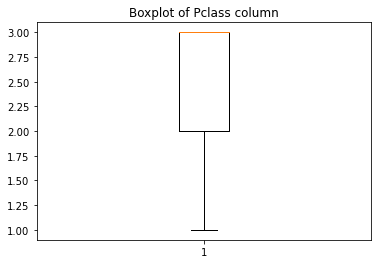

In [52]:
plt.boxplot(data['Pclass'])
plt.title('Boxplot of Pclass column')

No Outliers

Text(0.5, 1.0, 'Boxplot of Parch column')

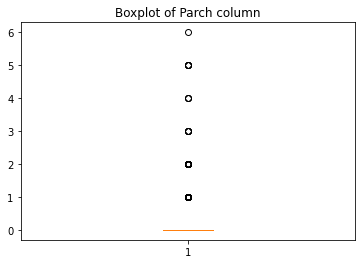

In [53]:
plt.boxplot(data['Parch'])
plt.title('Boxplot of Parch column')

In [54]:
Q1 =np.percentile(data['Parch'],25,interpolation='midpoint')
Q2 =np.percentile(data['Parch'],50,interpolation='midpoint')
Q3 =np.percentile(data['Parch'],75,interpolation='midpoint')

In [55]:
print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 0.0
Q2 = 0.0
Q3 = 0.0


# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [56]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,0.387515,2.347468,27.746961,0.541814,0.386337,31.590365
std,0.487470,0.820217,10.998343,1.123697,0.809205,49.630167
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.108300
75%,1.000000,3.000000,33.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,54.000000,8.000000,6.000000,512.329200


In [57]:
data.select_dtypes(include='object')

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,B96 B98,S
...,...,...,...,...,...
887,"Montvila, Rev. Juozas",male,211536,B96 B98,S
888,"Graham, Miss. Margaret Edith",female,112053,B42,S
889,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,B96 B98,S


find out how many categorical Values are there

# To convert categorical value ,use Label Encoding

In [58]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

In [59]:
data['Name'] =label_enc.fit_transform(data['Name'])

In [60]:
data['Sex'] =label_enc.fit_transform(data['Sex'])

In [61]:
data['Ticket'] =label_enc.fit_transform(data['Ticket'])

In [62]:
data['Cabin'] =label_enc.fit_transform(data['Cabin'])

In [63]:
data['Embarked'] =label_enc.fit_transform(data['Embarked'])

In [64]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,104,1,22.0,1,0,496,7.2500,38,2
2,1,1,182,0,38.0,1,0,567,71.2833,69,0
3,1,3,339,0,26.0,0,0,637,7.9250,38,2
4,1,1,261,0,35.0,1,0,41,53.1000,45,2
5,0,3,15,1,35.0,0,0,448,8.0500,38,2


All the categorical values are Encoded

In [65]:
data.dtypes

Survived      int64
Pclass        int64
Name          int32
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Ticket        int32
Fare        float64
Cabin         int32
Embarked      int32
dtype: object

In [66]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Normalization

In [67]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [68]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,104,1,22.0,1,0,496,7.2500,38,2
2,1,182,0,38.0,1,0,567,71.2833,69,0
3,3,339,0,26.0,0,0,637,7.9250,38,2
4,1,261,0,35.0,1,0,41,53.1000,45,2
5,3,15,1,35.0,0,0,448,8.0500,38,2
...,...,...,...,...,...,...,...,...,...,...
887,2,525,1,27.0,0,0,87,13.0000,38,2
888,1,291,0,19.0,0,0,12,30.0000,22,2
889,3,398,0,28.0,1,2,643,23.4500,38,2


In [69]:
X.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [70]:
X = preprocessing.normalize(X)

In [71]:
type(X)

numpy.ndarray

In [72]:
X = pd.DataFrame(X,columns=['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])

In [73]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.005897,0.204422,0.001966,0.043243,0.001966,0.000000,0.974937,0.014251,0.074693,0.003931
1,0.001653,0.300877,0.000000,0.062821,0.001653,0.000000,0.937348,0.117844,0.114069,0.000000
2,0.004149,0.468809,0.000000,0.035956,0.000000,0.000000,0.880919,0.010960,0.052551,0.002766
3,0.003630,0.947510,0.000000,0.127061,0.003630,0.000000,0.148843,0.192769,0.163364,0.007261
4,0.006647,0.033237,0.002216,0.077553,0.000000,0.000000,0.992675,0.017837,0.084200,0.004432
...,...,...,...,...,...,...,...,...,...,...
844,0.003743,0.982476,0.001871,0.050527,0.000000,0.000000,0.162810,0.024328,0.071113,0.003743
845,0.003399,0.989001,0.000000,0.064574,0.000000,0.000000,0.040784,0.101959,0.074770,0.006797
846,0.003957,0.525027,0.000000,0.036937,0.001319,0.002638,0.848222,0.030934,0.050128,0.002638
847,0.009902,0.772391,0.009902,0.257464,0.000000,0.000000,0.059415,0.297073,0.495122,0.000000


In [74]:
X.describe()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,0.004917,0.698690,0.001409,0.061787,0.001155,0.000856,0.561978,0.071794,0.097992,0.003423
std,0.003114,0.264438,0.001663,0.056344,0.002418,0.002089,0.285148,0.121699,0.091393,0.003258
min,0.000895,0.000000,0.000000,0.000533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003052,0.525027,0.000000,0.033168,0.000000,0.000000,0.326672,0.013855,0.051896,0.001972
50%,0.004257,0.774596,0.001283,0.045907,0.000000,0.000000,0.596047,0.028234,0.067018,0.002827
75%,0.005923,0.918822,0.001831,0.070551,0.001441,0.000000,0.816289,0.075824,0.114750,0.004047
max,0.029035,0.998206,0.018908,0.737426,0.019232,0.015769,0.997312,0.921822,0.749968,0.037817


In [75]:
X.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# TO Find mean Square Error

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [77]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [78]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error  =",mean_squared_error(y_test,predictions))
print('R Squared Value =',r2_score(y_test,predictions))

Mean Squared Error  = 0.21926552862182752
R Squared Value = 0.11299359222133065


# MinMax Scaling

In [80]:
X.describe()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,0.004917,0.698690,0.001409,0.061787,0.001155,0.000856,0.561978,0.071794,0.097992,0.003423
std,0.003114,0.264438,0.001663,0.056344,0.002418,0.002089,0.285148,0.121699,0.091393,0.003258
min,0.000895,0.000000,0.000000,0.000533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003052,0.525027,0.000000,0.033168,0.000000,0.000000,0.326672,0.013855,0.051896,0.001972
50%,0.004257,0.774596,0.001283,0.045907,0.000000,0.000000,0.596047,0.028234,0.067018,0.002827
75%,0.005923,0.918822,0.001831,0.070551,0.001441,0.000000,0.816289,0.075824,0.114750,0.004047
max,0.029035,0.998206,0.018908,0.737426,0.019232,0.015769,0.997312,0.921822,0.749968,0.037817


In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [83]:
X = min_max_scaler.fit_transform(X)

In [84]:
type(X)

numpy.ndarray

In [86]:
X = pd.DataFrame(X,columns=['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])

In [87]:
X.describe()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,0.142911,0.699945,0.074516,0.083124,0.060064,0.054294,0.563493,0.077883,0.130662,0.090526
std,0.110647,0.264914,0.087928,0.076461,0.125737,0.132458,0.285917,0.132020,0.121862,0.086143
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076648,0.525971,0.000000,0.044287,0.000000,0.000000,0.327553,0.015030,0.069198,0.052156
50%,0.119460,0.775987,0.067861,0.061574,0.000000,0.000000,0.597654,0.030628,0.089361,0.074744
75%,0.178669,0.920473,0.096818,0.095018,0.074916,0.000000,0.818489,0.082254,0.153007,0.107023
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [89]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

In [90]:
print("Mean Squared Error  =",mean_squared_error(y_test,predictions))
print('R Squared Value =',r2_score(y_test,predictions))

Mean Squared Error  = 0.21926552862182871
R Squared Value = 0.11299359222132566
